In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
import kNN

In [3]:
# Task A:

# ROC class
class ROC:
    #constructor
    def __init__(self, Probs, TrueClass):
        self.data = pd.DataFrame(data = (Probs, TrueClass)).T
        self.data.columns = ['Probs', 'TrueClass']

# Task B:

    #compute_ROC_coordinates method (given)
    def compute_ROC_coordinates(self):

        data = self.data
        #sort Probs in decreasing order
        data = data.sort_values(data.columns[0], ascending = False)
        FP = 0
        TP = 0
        ROC_coordinates = []
        P = data['TrueClass'].value_counts()[1]
        N = data['TrueClass'].value_counts()[0]
        # print('P', P)
        # print('N', N)

        Previos_Prob = float('-inf')

        for i in range (P+N):  # for each i-th instance
            #probability of the current element i
            Probs_i = data.iloc[i][0]
            #compare probability of current element and the previous one
            if Probs_i != Previos_Prob:
                #if not equal add a new coordinate to ROC_coordinates list
                ROC_coordinates.append(((FP/N), (TP/P)))
                #reassign the previous element to the current one
                Previos_Prob = Probs_i
            #true class of the current element
            TrueClass_i = data.iloc[i][1]
            #increment True Positives by one if class of the current element is 1
            if TrueClass_i == 1:
                TP += 1
            #else increment False Positive by one
            else:
                FP += 1
        #add the last point to the coordinates list
        ROC_coordinates.append(((FP/N), (TP/P)))
        return ROC_coordinates

    #compute_ROC_coordinates method (a different approach)
    def compute_ROC_coordinates_new(self):

        data = self.data
        #sort Probs in decreasing order
        data = data.sort_values(data.columns[0], ascending = False)

        ROC_coordinates = []
        P = data['TrueClass'].value_counts()[1]
        N = data['TrueClass'].value_counts()[0]
        # print('P', P)
        # print('N', N)

        #iterate thresholds from 0.0 to 1.0
        #the threshold is initially 0, and then it increments by 0.05 until it is equal to 1
        thresholds = np.arange(0.0, 1.01, 0.05) #([0.0, 0.05, 0.1, ..., 0.95, 1.0])

        #assign previous False Positive abd True Positive rates to none
        FPR_prev = None
        TPR_prev = None

        #itterate trough thresholds
        for threshold in thresholds:
            FP=0
            TP=0
            threshold = round(threshold,2)
            #for each i-th instance
            for i in range(P+N):
                #true class of the current element
                TrueClass_i = data.iloc[i][1]
                #probability of the current element i
                Probs_i = data.iloc[i][0]
                #check if probability of the current element is bigger or equal to threshold
                if Probs_i >= threshold:
                    #if true class of the current element is one, increase True Positives by one
                    if TrueClass_i == 1:
                        TP = TP + 1
                    #if true class of the current element is zero, increase False Positives by one
                    if TrueClass_i == 0:
                        FP = FP + 1
            #check if the coordinate obtained is not equal to the previous one
            if not (FPR_prev == FP/N and TPR_prev == TP/P):
                #if the condition is met, add the new coordinate to the `ROC_coordinates` list
                ROC_coordinates.append(((FP/N), (TP/P)))
            #reassign the previous False Positive abd True Positive rates to the current ones
            FPR_prev = FP/N
            TPR_prev = TP/P
        return ROC_coordinates

# Task C:

    #method plot_ROC
    def plot_ROC(self, ROC_coordinates):
        xs = [x[0] for x in ROC_coordinates]
        ys = [x[1] for x in ROC_coordinates]
        plt.plot(xs, ys, linestyle='--', marker='o', color='red', lw = 2, label='ROC curve', clip_on=False)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

# Task D:

    # method compute_AUCROC
    def compute_AUCROC(self, ROC_coordinates):
        xs = [x[0] for x in ROC_coordinates]
        ys = [x[1] for x in ROC_coordinates]
        #using a sklearn function `auc` from metrics package
        auc = metrics.auc(xs, ys)
        return auc

### Comments on task B:

#### A (the pseudocode in Appendix A):
This approach solves this problem in the following way: It iterates through all instances and adds a new coordinate point to the list only if probability of being positive of the current instance is not equal to the previous one.

#### B (your method compute_ROC_coordinates):
This approach solves this problem in the following way: It first creates a list of `thresholds` that stores values from 0.0 to 1.0, starting at 0.0 with a step size of 0.05. These values are used to compare to a probability of being positive of an instance. After creating a `thresholds` list, it iterates through this list and for each value `threshold` it iterates through each instance. If probability of being positive of the instance is bigger or equal to `threshold`, it verifies the true class of the instance, updates the True Positive and False Positive rates. Only then it checks the inequality of the current and previous True Positive and False Positive rate, if they are not equal it adds the new coordinate to the list of `ROC_coordinates`.
This approach is still a worse decision in comparison to the approach discussed in A because it uses a nested for loop what makes it computationally heavier.

In [26]:
#converter_to_binar method
#is used to convert string discrete classes to binary ones (positive = 1, negative = 0)
def converter_to_binary(Y_train):
    Y_train_binary = []
    for i in range(len(Y_train)):
        if Y_train.iloc[i] == 'tested_positive':
            Y_train_binary.append(1)
        else:
            Y_train_binary.append(0)
    return Y_train_binary

In [47]:
# Task E:

from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

#create the classifier
clf = kNN.kNN()
clf.fit(X_train, Y_train)
df = clf.getClassProbs(X_test).fillna(0)

#Probs and TrueClass
Probs = df['tested_positive']
Probs_list = Probs.values.tolist()
TrueClass = converter_to_binary(Y_test)
#ROC analysis
roc = ROC(Probs_list, TrueClass)
roc_cord = roc.compute_ROC_coordinates()
auc = roc.compute_AUCROC(roc_cord)
print('auc = ',auc)

P 94
N 168
auc =  0.7246707193515705


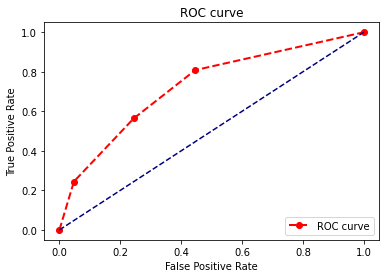

In [46]:
roc.plot_ROC(roc_cord)